## 11.1 核与核技巧

## 11.2 最大间隔分类和支持向量

## 11.3 用 scikit-learn 分类字符

### 11.3.1 手写数字分类

代码 11.1

http://yann.lecun.com/exdb/mnist/

In [1]:
import gzip
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 定义加载图像数据的函数
def load_mnist_images(image_path):
    with gzip.open(image_path, 'rb') as f:
        # 跳过文件头
        f.read(16)
        # 读取图像数据
        buf = f.read()
        # 将数据转换为NumPy数组
        data = np.frombuffer(buf, dtype=np.uint8).reshape(-1, 28, 28)
    return data

# 定义加载标签数据的函数
def load_mnist_labels(label_path):
    with gzip.open(label_path, 'rb') as f:
        # 跳过文件头
        f.read(8)
        # 读取标签数据
        buf = f.read()
        # 将数据转换为NumPy数组
        labels = np.frombuffer(buf, dtype=np.uint8)
    return labels

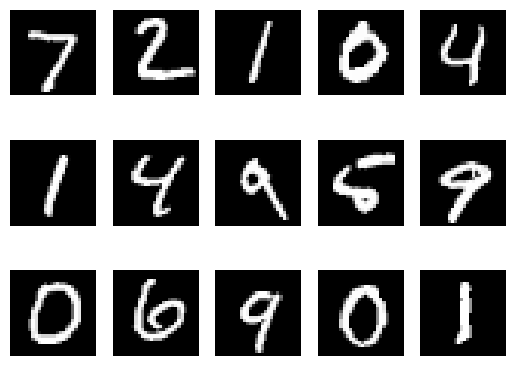

In [2]:
mnist_data = load_mnist_images("data\\mnist\\t10k-images-idx3-ubyte.gz")

# 显示前 15 张图像
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(mnist_data[i], cmap=cm.Greys_r)
    plt.axis('off')
plt.show()

代码 11.2

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

mnist_target = load_mnist_labels("data\\mnist\\t10k-labels-idx1-ubyte.gz")
X, y = mnist_data, mnist_target
X = X / 255.0 * 2 - 1
X = X.reshape(X.shape[0], -1)  # Reshape X to (n_samples, n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
pipeline = Pipeline([('clf', SVC(kernel='rbf', gamma=0.01, C=100))])
# parameters = {
#     'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
#     'clf__C': (0.1, 0.3, 1, 3, 10, 30),
# }
parameters = {
    'clf__gamma': [0.1,0.1],
    'clf__C': [0.1,1]
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
grid_search.fit(X_train[:10000], y_train[:10000])
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name,best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.215
Best parameters set:
	clf__C: 1
	clf__gamma: 0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       1.00      0.74      0.85       281
           2       0.11      1.00      0.20       248
           3       1.00      0.01      0.02       232
           4       1.00      0.00      0.01       275
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       239
           7       1.00      0.16      0.28       267
           8       0.00      0.00      0.00       250
           9       1.00      0.12      0.22       235

    accuracy                           0.21      2500
   macro avg       0.51      0.20      0.16      2500
weighted avg       0.53      0.21      0.17      2500



C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 11.3.2 自然图片字符分类

代码 11.3

In [4]:
# http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/#download

In [5]:
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from PIL import Image

X = []
y = []
for path, subdirs, files in os.walk('./English/Img/GoodImg/Bmp/'):
    for filename in files:
        f = os.path.join(path, filename)
        target = filename[3:filename.index('-')]
        img = Image.open(f).convert('L').resize((30, 30), resample=Image.LANCZOS)
        X.append(np.array(img).reshape(900, ))
        y.append(target)
X = np.array(X)

代码 11.4

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=11)
pipeline = Pipeline([
 ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])
# parameters = {
#  'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
#  'clf__C': (0.1, 0.3, 1, 3, 10, 30),
# }
parameters = {
 'clf__gamma': (0.01, 0.03),
 'clf__C': (0.1, 0.3),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.073
Best parameters set:
	clf__C: 0.1
	clf__gamma: 0.01
              precision    recall  f1-score   support

         001       0.00      0.00      0.00        13
         002       0.00      0.00      0.00         8
         003       0.00      0.00      0.00        11
         004       0.00      0.00      0.00         4
         005       0.00      0.00      0.00         7
         006       0.00      0.00      0.00         6
         007       0.00      0.00      0.00         6
         008       0.00      0.00      0.00         3
         010       0.00      0.00      0.00         2
         011       0.07      1.00      0.12        51
         012       0.00      0.00      0.00        13
         013       0.00      0.00      0.00        21
         014       0.00      0.00      0.00        21
         015       0.00      0.00      0.00        44
         016       0.00      0.00      0.00         6
     

C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\devtools\python\python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
